In [1]:
import pandas as pd 
import seaborn as sns
from mplsoccer.pitch import Pitch 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('messi.csv')

In [4]:
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [5]:
df['x'] = df['x'] * 1.2
df['y'] = df['y'] * 0.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*0.8

In [6]:
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


/tmp/ipykernel_15633/2176562163.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(


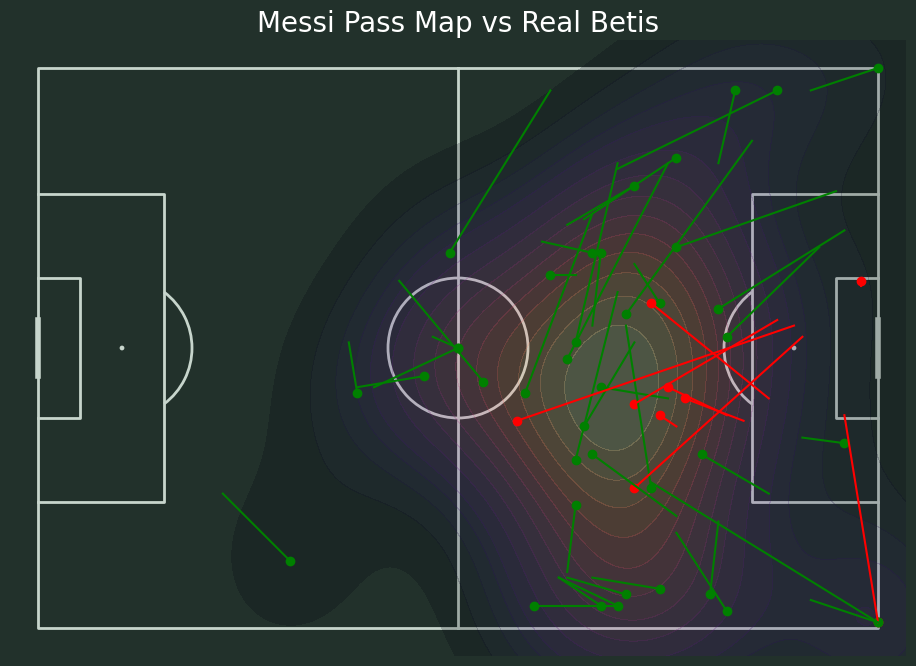

In [16]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax, constrained_layout=False, tight_layout=True, figsize=(13.5, 8))
plt.gca().invert_yaxis()

#heat-map

kde = sns.kdeplot(
    x=df['x'],
    y=df['y'],
    shade=True,
    alpha=0.2,
    n_levels=15,
    cmap='magma'
)

#use a for loop to plot each pass
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')

plt.title('Messi Pass Map vs Real Betis',color='white',size=20)
plt.savefig('passmap.png')